# Predecir enfermedad cardiaca con machine learning
>utilizando herramientas de machine learning y de data science seremos capaces de predecir un problema cardiaco basado en data estructurada para el apoyo del personal de salud.

>Pasos a seguir para completar el proyecto: 

> 1. definición del problema
> 2. data
> 3. métricas
> 4. características
> 5. modelar
> 6. experimentación y mejoras

# 1 Definición del problema

> En este caso queremos clasificar si un paciente posee problemas cardiacos o no. 

# 2 Data

> Obtenida de la página UCI y en formato csv desde la página KAGGLE

# 3 Evaluación/Métricas

> La métrica que utilizaremos para este proyecto, al tratarse de evaluar si un paciente posee riesgo de enfermedad cardiaca, será de obtener una precisión igual o superior al 95%. Es decir, que nuestro modelo pueda predecir en un 95% de eficacia si un paciente posee una enfermedad cardiaca o no

# 4 Features de la data

> Estas son las "Features" que posee nuestra data descargada :
* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


## Importando librerías

Antes de empezar a trabajar, dejaremos importadas las librerías que necesitaremos en este proyecto.
Al momento de crear el enviroment, olvidé de instalar "seaborn", por lo que tendremos que instalarlo desde jupyter con las siguientes líneas de código

In [1]:
#import seaborn to our enviroments
import sys
!conda install -y --prefix {sys.prefix} seaborn

Solving environment: done

# All requested packages already installed.



In [2]:
#import libraries for datascience and data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#import libraries for models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#for model evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score 
from sklearn.metrics import plot_roc_curve

# Explorando nuestros datos. EDA exploration data analysis
> la idea de esta sección es sentirse más familizarizado con la data, entenderla y saber qué data tenemos

EDA:
 1. ¿Qué trataremos de resolver? (qué tipo de problema)
 2. ¿Qué tipo de datos tenemos a disposición? (numérico, categórico)
 3. ¿Cuánta y qué data no existen y qué haremos con ella? 
 4. ¿Existen datos atípicos? 
 5. ¿Cómo podemos mejorar la data que tenemos?

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/heart-disease.csv')
df.shape #entrega la cantidad de filas y columnas que tiene este df

(303, 14)

In [4]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
#veamos cuanta data tenemos relacionada a las etiquetas (target)
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

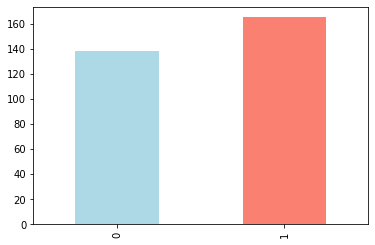

In [6]:
#podemos visualizar esta data relacionada al target
df['target'].value_counts().plot(kind = 'bar', color = ['salmon', 'lightblue']);

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
#veamos si existen valores nulos
df.isna().sum() #en este caso no existen

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Buscando patrones
buscaremos patrones asociados al target = 1. Veremos ahora si existe alguna relación con la edad

In [10]:
#sex: 1 es hombre. 0 es mujer
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [11]:
# comparar el target con el sexo
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


Tenemos una información muy valiosa en este caso, ya que si redondeamos la cantidad de mujeres (96) a 100, tenemos que 75% poseen enfermedad cardiaca (72). Mientras que en los hombres es menor la cantidad, al rededor de un 49 a 50%

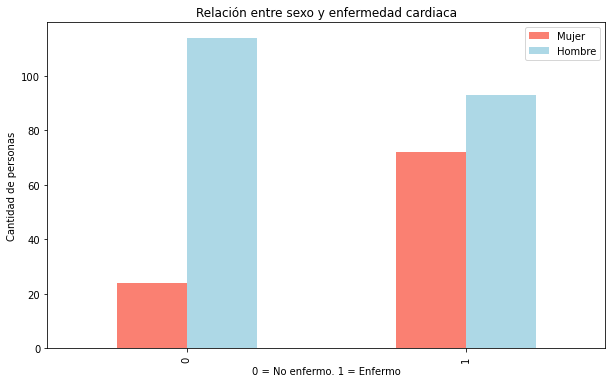

In [12]:
# crearemos visualizacione
pd.crosstab(df.target, df.sex).plot(kind = 'bar', 
                                    color = ['salmon', 'lightblue'], 
                                    figsize = (10, 6))
plt.title('Relación entre sexo y enfermedad cardiaca')
plt.xlabel('0 = No enfermo. 1 = Enfermo')
plt.ylabel('Cantidad de personas')
plt.legend(['Mujer', 'Hombre']);

Ahora compararemos la relacion entre la enfermedad cardiaca y la edad. Haremos una visualización rápida

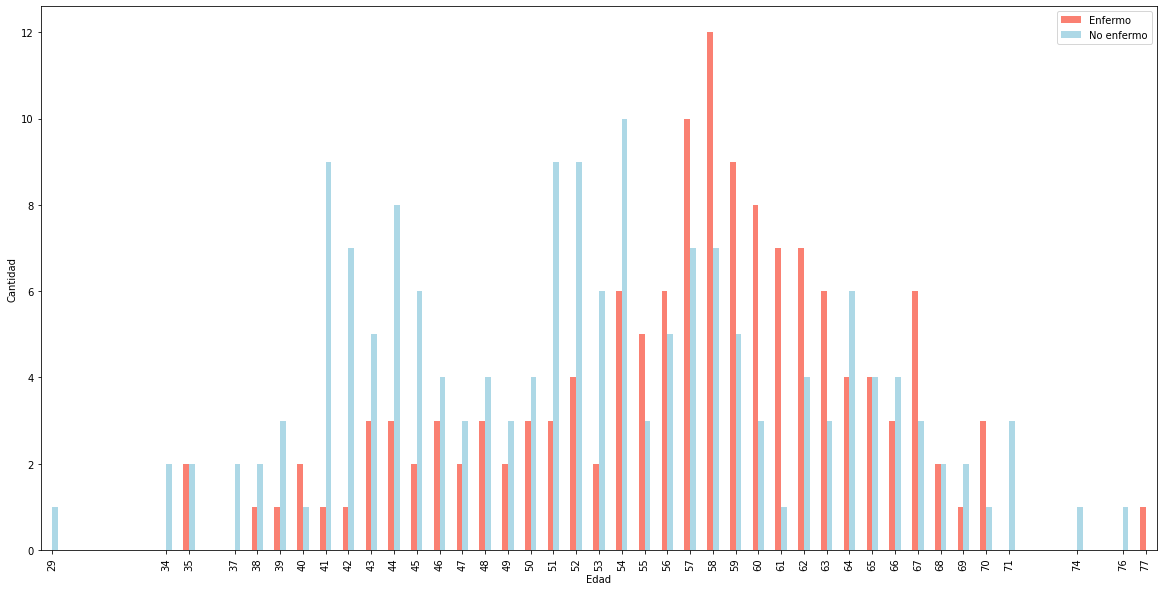

In [13]:
pd.crosstab(df.age, df.target).plot(kind='bar',
                                   figsize = (20, 10),
                                   color = ['salmon', 'lightblue'])
plt.xlabel('Edad')
plt.ylabel('Cantidad')
plt.legend(['Enfermo', 'No enfermo']);

## Ahora veremos la relación entre la edad y la frecuencia cardiaca en pacientes con enfermedades cardiacas o sin enfermedades cardiacas

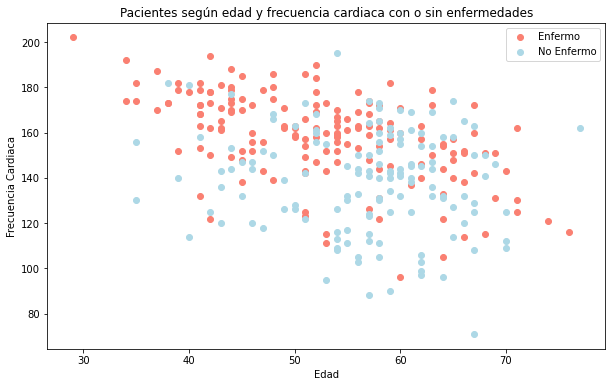

In [14]:
plt.figure(figsize = (10,6))

#haremos un gráfico de puntos para ver cómo se dispersa la data con positivos
plt.scatter(df.age[df.target == 1], 
           df.thalach[df.target == 1],
           c = 'salmon')

# puntos con pacientes sin enfermedades cardiacas
plt.scatter(df.age[df.target == 0],
           df.thalach[df.target == 0], 
           c = 'lightblue')

# añadimos información al gráfico
plt.title('Pacientes según edad y frecuencia cardiaca con o sin enfermedades' );
plt.xlabel('Edad')
plt.ylabel('Frecuencia Cardiaca')
plt.legend(['Enfermo', 'No Enfermo']);

### Veremos la distribución de la edad con un histograma

Text(0, 0.5, 'Frecuencia')

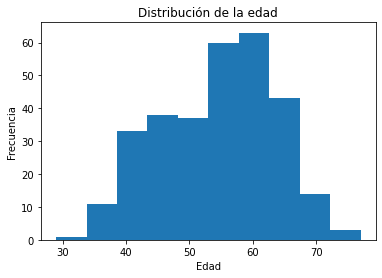

In [15]:
df.age.plot.hist(bins = 10);
plt.title('Distribución de la edad');
plt.xlabel('Edad')
plt.ylabel('Frecuencia')

### Frecuencia de enfermedad según el grado de dolor

In [16]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


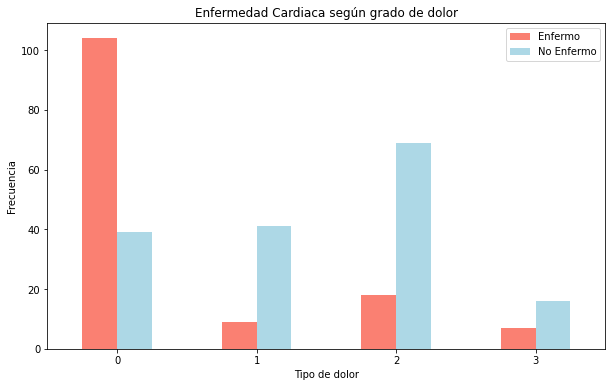

In [17]:
#haremos un gráfico ya que esto es anormal.
pd.crosstab(df.cp, df.target).plot(kind = 'bar',
                                  figsize = (10, 6),
                                  color = ['salmon', 'lightblue'])

plt.title('Enfermedad Cardiaca según grado de dolor')
plt.xlabel('Tipo de dolor')
plt.ylabel('Frecuencia')
plt.legend(['Enfermo', 'No Enfermo'])
plt.xticks(rotation = 0); 

### Creamos una matriz de correlación para observar la "correlación" entre las variables dependientes y la independiente

In [18]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


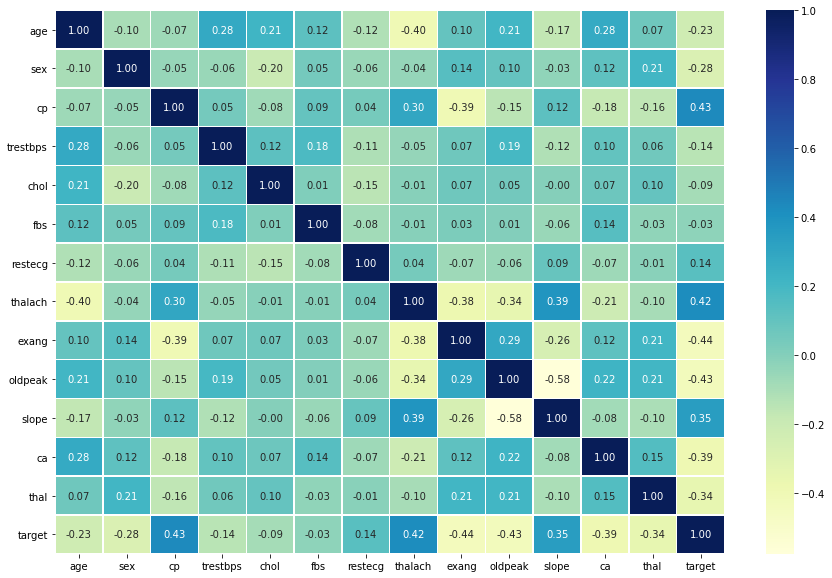

In [19]:
# haremos mejor la visualización
corr_matrx = df.corr()
fig, ax = plt.subplots(figsize = (15, 10) )
ax = sns.heatmap(corr_matrx, 
                annot = True, 
                linewidths = 0.5, 
                fmt = '.2f',
                cmap = 'YlGnBu');

# 5. Modelando

In [20]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [21]:
# separaremos la data en X y
X = df.drop('target', axis = 1)
y = df['target']

In [22]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [23]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [24]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [25]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


Una vez que separamos la data en entrenamiento y test, crearemos nuestro modelo de machine learning. Para ello buscaremos el mejor mediante esta página que nos otorga un mapa de modelos/estimadores según el problema que queramos resolver, en este caso, de clasificación.
https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

## En este caso vamos a utilizar 3 modelos de clasificación
  1. Logistic Regression
  2. Kneighbors 
  3. Random Forest

In [26]:
#pondremos los modelos en un diccionario
models = {
    'Logistic Regression' : LogisticRegression(),
    'KNN' : KNeighborsClassifier(),
    'Random': RandomForestClassifier()
}#fin dict

#creamos la función para entrenar
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Entrenamiento y verificar su eficacia.
    Requerirá de un diccionario con modelos y la data ya separada 
    """
    np.random.seed(42)
    #guardamos la puntuación en un diccionario 
    models_score = {}
    
    #loop
    for name, model in models.items():
        #entrenamos el modelo
        model.fit(X_train, y_train)
        #evaluamos su desempeño
        models_score[name] = model.score(X_test, y_test)
        
    #retornamos los scores de los modelos
    return models_score

In [27]:
#entrenamos los modelos 
models_scores = fit_and_score(models, X_train, X_test, y_train, y_test)
models_scores

/Users/Lucho/Desktop/Informática/proyecto_machine_learning/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random': 0.8360655737704918}

## Comparación de modelos

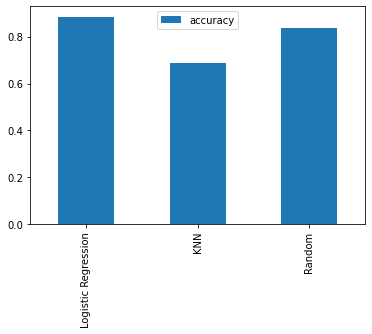

In [28]:
models_compare = pd.DataFrame(models_scores, index = ['accuracy'])
models_compare.T.plot.bar();

In [29]:
for model in models.keys():
    print(model)

Logistic Regression
KNN
Random


## Mejorando los hiperparámetros de KNN manualmente

In [30]:
#KNN hyperparams
train_scores = [] 
test_scores = []

#crear una lista con neighbors diferentes
neighbors = range(1, 21)

#Instanciar
knn = KNeighborsClassifier()

#loop para probar con distintos neighbors

for i in neighbors:
    knn.set_params(n_neighbors = i)
    #entrenamiento
    knn.fit(X_train, y_train)
    
    #actualizar los train y test scores 
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))


In [31]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [32]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

el puntaje máximo que pudimos obtener, es de 75.41%


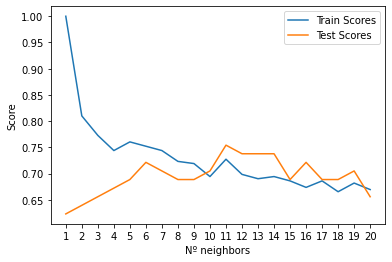

In [33]:
plt.plot(neighbors, train_scores, label= 'Train Scores')
plt.plot(neighbors, test_scores, label = 'Test Scores')
plt.xticks(range(1,21))
plt.xlabel('Nº neighbors')
plt.ylabel('Score')
plt.legend()
print(f'el puntaje máximo que pudimos obtener, es de {max(test_scores) * 100:.2f}%')


## Mejorando los hiperparámetros con RandomSearchCV

Mejoraremos:
* LogisticRegression()
* RandomForestClassifier()
usando RandomSearchCV

Creando grid para LogisticRegression

In [34]:
log_reg_grid = {
    'C' : np.logspace(-4, 4,20 ),
    'solver': ['liblinear']
}#end

crearemos un grid para RandomForestClassifier

In [35]:
rf_grid = {
    'n_estimators' : np.arange(10, 1000, 50),
    'max_depth':[None, 3, 5, 10],
    'min_samples_split': np.arange(2,20,2),
    'min_samples_leaf': np.arange(1, 20, 2)
}#end

Mejorando LogisticRegression()

In [36]:
np.random.seed(42)

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions = log_reg_grid,
                               cv = 5,
                               n_iter = 20,
                               verbose = True)

#fit random hyperparam
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.8s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [37]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [38]:
rs_log_reg.score(X_test,y_test)

0.8852459016393442

Ahora modificaremos el randomforrest

In [39]:
np.random.seed(42)

rs_forest = RandomizedSearchCV(RandomForestClassifier(),
                               param_distributions = rf_grid,
                               cv = 5,
                               n_iter = 20,
                               verbose = True)

#fit random hyperparam
rs_forest.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.6min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

buscando los mejores hiperparametros

In [40]:
rs_forest.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [41]:
rs_forest.score(X_test, y_test)

0.8688524590163934

# Hiperparámetros con GridSearchCV

In [42]:
log_reg_grid = {
    'C' : np.logspace(-4, 4,30 ),
    'solver': ['liblinear']
}#end

In [43]:
np.random.seed(42)

gs_log_reg = GridSearchCV (LogisticRegression(),
                               param_grid = log_reg_grid,
                               cv = 5,
                               verbose = True)

#fit random hyperparam
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.1s finished


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [44]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [45]:
gs_log_reg.score(X_test, y_test)

0.8852459016393442

## Evaluando nuestro modelo

### Evaluaremos nuestros modelos
* Roc Curve 
* Confusion Matrix
* Classification Report
* Precision
* Recall
* F1-Score

In [46]:
#para poder hacer nuestras comparaciones, primero debemos obtener las predicciones
y_preds = gs_log_reg.predict(X_test)

In [47]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

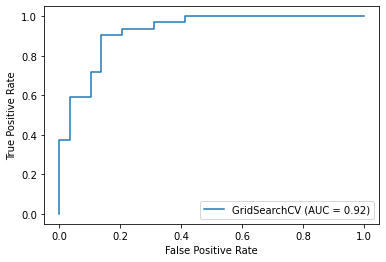

In [48]:
plot_roc_curve(gs_log_reg,X_test, y_test)
#cerca del 1 es un buen modelo, en este caso, lo es

## Confusion Matrix para ver los falsos positivos y falsos negativos

In [49]:
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


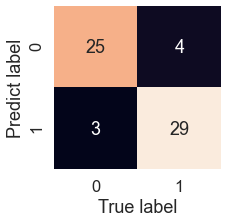

In [50]:
sns.set(font_scale = 1.5)

def plot_conf_matrix(y_test, y_preds):
    """
    Recibe como parámetros y_test - y_preds
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds), 
                    annot = True, 
                    cbar = False)
    plt.xlabel('True label')
    plt.ylabel('Predict label')
    
plot_conf_matrix(y_test, y_preds)

una vez ya analizado ROC Curve y confusion matrix, veremos las siguientes funciones/métricas para evaluar nuestro modelo, que en este caso es regresión logística:
* Classification Report
* Cross Validation
* Recall
* f1 - score

In [51]:
print(classification_report(y_test, y_preds))
#en este caso está tomando las mismas muestras que fueron separadas al principio

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



## Ahora calcularemos con cross-validation
Para ello, crearemos el modelo con los parámetros obtenidos con GridSearch y separaremos la data en 5 partes

In [52]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [53]:
clf = LogisticRegression(C =0.23357214690901212, 
                        solver = 'liblinear')

In [54]:
#cross-validation accuracy 
cv_acc = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring ='accuracy') 
cv_acc

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [55]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8479781420765027

In [56]:
#cross-validation precision
cv_pr = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring ='precision') 
cv_pr = np.mean(cv_pr)
cv_pr

0.8215873015873015

In [57]:
#cross validation recall
cv_rc = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring ='recall') 
cv_rc = np.mean(cv_rc)
cv_rc

0.9272727272727274

In [58]:
#cross validation f1 score
cv_f1 = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring ='f1') 
cv_f1 = np.mean(cv_f1)
cv_f1

0.8705403543192143

In [59]:
#crearemos un dataFrame para visualizar mejor la data
cv_metrics = pd.DataFrame({'Accuracy': cv_acc,
                          'Precission': cv_pr,
                          'recall': cv_rc,
                          'f1': cv_f1}, 
                         index = [0])

cv_metrics

,Accuracy,Precission,recall,f1
0,0.847978,0.821587,0.927273,0.87054


<AxesSubplot:>

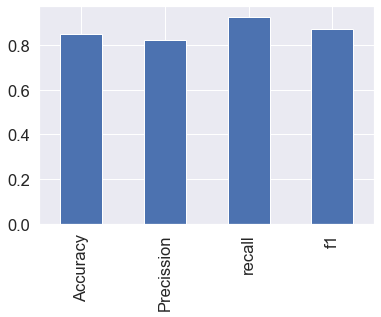

In [60]:
cv_metrics.T.plot.bar(legend=False)

## Buscando la data más importante

¿Cual data/features contribuye al aprendizaje del modelo?

> cada modelo posee distinta data importante para su aprendizaje

En este caso, buscaremos las características más relevantes "Feature Importance" para nuestro modelo, que es de Regreión Logística

In [61]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [64]:
#primero debemos entrenar el modelo. Ocuparemos los parametros que posee el GridSearch
gs_log_reg.best_params_
clf = LogisticRegression(C = 0.20433597178569418, solver = 'liblinear')
clf.fit(X_train, y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

En este caso vamos a utilizar el atributo del modelo "coef_" que nos dará el coeficiente de relación que posee cada variable independiente con el target. Es importante destacar que cada modelo tiene su propia medida de ver qué variables son las que más importan al momento de aprender, en este caso encontramos esto. 

In [65]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [66]:
clf.coef_

array([[ 0.00320769, -0.86062049,  0.66001432, -0.01155971, -0.00166496,
         0.04017236,  0.31603405,  0.02458922, -0.60470171, -0.56795456,
         0.45085392, -0.63733328, -0.67555094]])

Para que tenga más sentido visual, vamos a crear un diccionario para ver mejor esta información

In [67]:
# haremos un match
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0032076883508599633,
 'sex': -0.8606204883695241,
 'cp': 0.660014324982524,
 'trestbps': -0.01155970600550047,
 'chol': -0.0016649614843449207,
 'fbs': 0.040172360271308105,
 'restecg': 0.31603405294617176,
 'thalach': 0.02458922341328129,
 'exang': -0.604701713592625,
 'oldpeak': -0.5679545646616215,
 'slope': 0.4508539209693025,
 'ca': -0.6373332766360461,
 'thal': -0.6755509369619848}

In [70]:
feature_df = pd.DataFrame(feature_dict, index = [0])

In [71]:
feature_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.003208,-0.86062,0.660014,-0.01156,-0.001665,0.040172,0.316034,0.024589,-0.604702,-0.567955,0.450854,-0.637333,-0.675551


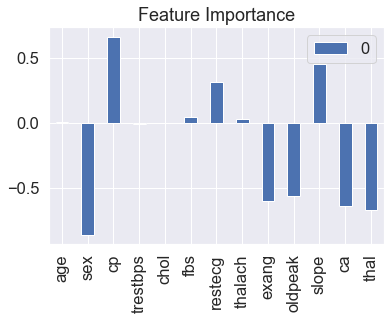

In [77]:
feature_df.T.plot.bar()
plt.title('Feature Importance');
#es importante saber que esta información está muy relacionada al heatmap, o matriz de correlación que hicimos en EDA